[[ 10.  10.  10.  10.]
 [ 10.   5.   0.  10.]
 [ 10.   0.   0.  10.]
 [ 10.  10.  10.  10.]]
[[ 10.    10.    10.    10.  ]
 [ 10.     5.     6.25  10.  ]
 [ 10.     0.     0.    10.  ]
 [ 10.    10.    10.    10.  ]]
[[ 10.    10.    10.    10.  ]
 [ 10.     5.     6.25  10.  ]
 [ 10.     6.25   0.    10.  ]
 [ 10.    10.    10.    10.  ]]
[[ 10.     10.     10.     10.   ]
 [ 10.      5.      6.25   10.   ]
 [ 10.      6.25    8.125  10.   ]
 [ 10.     10.     10.     10.   ]]
[[ 0.  0.]
 [ 0.  0.]]


<IPython.core.display.Javascript object>


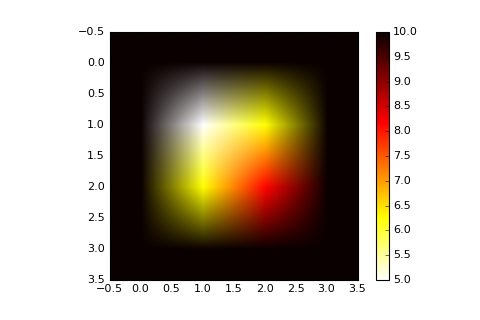

<IPython.core.display.Javascript object>


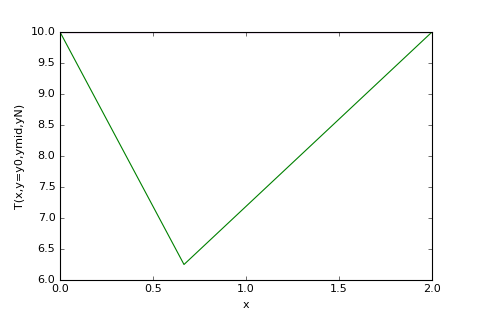

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:83: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


<IPython.core.display.Javascript object>


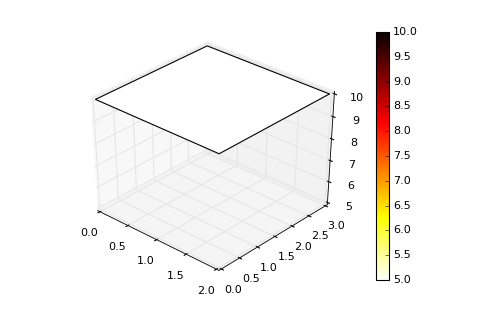

In [41]:
'''
Distribuicao de temperatura em placa aquecida com condicao de contorno fixa - Metodo de Liebmann (Gauss-Seidel)

Diferencas Finitas - Equacao de Laplace 2D
'''

# modulos
%matplotlib notebook
import numpy as np
import matplotlib.mlab as mlab # comandos compatíveis com Matlab
import matplotlib.pyplot as plt
import matplotlib.cm as cm # submodulo colormap 
from mpl_toolkits.mplot3d import Axes3D


# refinamento
m = 4
n = 4

# eixo x
x0 = 0.
xM = 2.

# eixo y
y0 = 0.
yN = 3.

# cond. contorno
tesq = 10.0  # esquerda
tdir = 10.0  # direita
tinf = 10.0   # inferior
tsup = 10.0 # superior

# parametro de relaxacao
k = 1.5

# malha 2D
x = np.linspace(x0,xM,m,endpoint=True)
y = np.linspace(y0,yN,m,endpoint=True)
X,Y = np.meshgrid(x, y)

# T(x,y)
T = X*0.

# preenchendo cond. contorno
T[:,0] = tesq 
T[:,-1] = tdir  
T[0,] = tinf  
T[-1,]= tsup 


# loop
tol = 0.01
err = tol+1
Tnew = T[1::-1,1::-1] 
Told = T[1::-1,1::-1] 

while np.all(err >= tol):     

    Told = T[1::-1,1::-1] 
    for i in range(1,m-1):
        for j in range(1,n-1):
            T[i,j] = 0.25*( T[i+1,j] + T[i-1,j] + T[i,j+1] + T[i,j-1] )
            print T

    Tnew = k*T[1::-1,1::-1] + (1.0-k)*Told
    err = np.abs( (Tnew - Told)/Tnew )    
    print err

    
# plot
fig, ax = plt.subplots()
cax = ax.imshow(T,cmap=cm.hot_r)
#plt.grid('on',ls='-',linewidth=1,color='pink')
cbar = fig.colorbar(cax)

# plot
fig2, ax = plt.subplots()
ymid = 0.5*(y0+yN)
ymid = np.round(ymid)
plt.plot(x,T[:,0])
plt.hold
plt.plot(x,T[:,ymid])
plt.plot(x,T[:,-1])
plt.xlabel('x')
plt.ylabel('T(x,y=y0,ymid,yN)')


fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,T,cmap=cm.hot_r)
cbar = fig2.colorbar(cax)

In [28]:
?np.arange

In [29]:
?np.linspace